In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde, chi2, pearsonr

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 35010732 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
cor1000 = pd.read_csv("correlations1kbig.csv")
cor10k = pd.read_csv("correlations10kbig.csv")

In [3]:
cor1000

,rho,prho,C,dC,A1,dA1,A2,dA2,D,dD,a1,da1,a2,da2,d,dd
0,-0.9,-0.877656,-15.267007,2.486990,0.054329,0.002495,0.881893,0.128428,0.999091,0.043894,0.054067,0.001800,0.834961,0.027000,0.996137,0.045765
1,-0.9,-0.900099,-19.138245,3.501383,0.055428,0.002570,1.113807,0.186298,0.999513,0.043077,0.055151,0.001852,1.039191,0.034874,0.996042,0.045714
2,-0.9,-0.917101,-23.718034,4.946586,0.057806,0.002677,1.425655,0.276539,1.023066,0.044296,0.057525,0.001963,1.306475,0.046285,1.019453,0.047285
3,-0.9,-0.916378,-24.512917,4.808133,0.050065,0.002288,1.274665,0.232997,1.014606,0.045027,0.049841,0.001670,1.178076,0.040720,1.011289,0.046623
4,-0.9,-0.898051,-19.630570,3.320215,0.048994,0.002207,1.008747,0.155739,1.023272,0.045986,0.048782,0.001600,0.948497,0.031676,1.019615,0.046463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.9,0.921362,25.277213,5.220932,1.368278,0.263701,0.052183,0.002392,0.992695,0.043399,1.255621,0.044176,0.051949,0.001751,0.989822,0.033898
946,0.9,0.916776,23.803724,4.680828,1.333610,0.243133,0.053883,0.002469,1.053811,0.046660,1.232458,0.043228,0.053644,0.001806,1.050037,0.036258
947,0.9,0.881841,15.704588,2.592853,0.880927,0.130181,0.052848,0.002420,0.980467,0.043349,0.832673,0.026824,0.052600,0.001754,0.977408,0.034628
948,0.9,0.870686,14.343724,2.250605,0.787251,0.109482,0.051416,0.002376,0.979278,0.043443,0.749197,0.023438,0.051185,0.001731,0.975865,0.035492


In [12]:
corr1000_avg = cor1000.groupby('rho').mean().reset_index()
corr1000_std = cor1000.groupby('rho').std().reset_index()
corr1000_avg

,rho,prho,C,dC,A1,dA1,A2,dA2,D,dD,a1,da1,a2,da2,d,dd
0,-9.000000e-01,-0.897735,-19.488244,3.545588,0.053017,0.002430,1.081869,0.180321,1.015522,0.044883,0.052776,0.001769,1.010378,0.033867,1.012235,0.046949
1,-8.000000e-01,-0.793805,-8.689801,1.714550,0.113195,0.006105,1.090101,0.183463,1.010736,0.039745,0.112322,0.003711,1.016974,0.034231,1.008468,0.051073
2,-7.000000e-01,-0.689988,-5.041125,1.092005,0.181447,0.011813,1.082304,0.181981,1.002863,0.037300,0.179351,0.005663,1.009889,0.033948,1.001027,0.056904
3,-6.000000e-01,-0.590149,-3.258985,0.774591,0.252120,0.019014,1.061108,0.175758,1.005731,0.036403,0.248193,0.007658,0.991697,0.033159,1.004073,0.055117
4,-5.000000e-01,-0.485540,-2.120184,0.577853,0.340371,0.029781,1.047022,0.171333,1.003415,0.035528,0.333287,0.010169,0.979854,0.032571,1.001989,0.048608
5,-4.000000e-01,-0.398868,-1.510563,0.483304,0.433046,0.043027,1.069158,0.177772,1.003425,0.034988,0.421515,0.012871,0.999272,0.033330,1.002024,0.044624
6,-3.000000e-01,-0.304848,-1.032406,0.411304,0.551615,0.062437,1.097948,0.187220,1.003916,0.034617,0.533009,0.016325,1.022589,0.034690,1.002622,0.041197
7,-2.000000e-01,-0.193720,-0.582687,0.325098,0.683431,0.087241,1.052863,0.174074,1.001265,0.034257,0.654778,0.020475,0.984320,0.032795,1.000038,0.037532
8,-1.000000e-01,-0.108229,-0.331746,0.304789,0.872347,0.130181,1.116356,0.193731,0.993048,0.033761,0.824233,0.026495,1.037771,0.035313,0.991878,0.035378
9,-2.220446e-16,0.000442,0.008758,0.269393,1.049521,0.174090,1.042961,0.171313,0.996906,0.033680,0.981036,0.032711,0.975617,0.032398,0.995754,0.033307


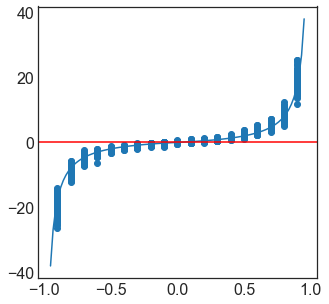

In [5]:
plt.figure(figsize=(5,5))
rho_theory = np.linspace(-0.95,0.95,100)
c_theory = 2*np.abs(rho_theory)/(1-np.abs(rho_theory))*np.sign(rho_theory)
plt.scatter(cor1000['rho'],cor1000['C'])
plt.plot(rho_theory,c_theory)
plt.axhline(y=0.0, color='r')

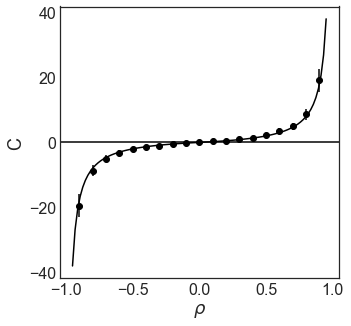

In [24]:
plt.figure(figsize=(5,5))
rho_theory = np.linspace(-0.95,0.95,100)
c_theory = 2*np.abs(rho_theory)/(1-np.abs(rho_theory))*np.sign(rho_theory)
plt.errorbar(corr1000_avg['rho'],corr1000_avg['C'],yerr=corr1000_avg['dC'],fmt="o",color='k')
plt.plot(rho_theory,c_theory,"k")
plt.axhline(y=0.0, color='k')
plt.xlabel(r'$\rho$')
plt.ylabel("C")
plt.savefig("corr.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [18]:
for rho in corr1000_avg['rho']:
    data1000_rho = cor1000[cor1000['rho']==rho]
    print(rho,data1000_rho['A1'].mean(),data1000_rho['A1'].std(),data1000_rho['dA1'].mean())
    print(rho,data1000_rho['A2'].mean(),data1000_rho['A2'].std(),data1000_rho['dA2'].mean())

-0.9 0.05301701459568897 0.002515516253284246 0.002429792563943476
-0.9 1.0818685626505147 0.15869614098396545 0.18032073951754793
-0.8 0.11319464223731397 0.0073424514917234795 0.006104937437321736
-0.8 1.0901007208305413 0.1688256052031771 0.18346285636164286
-0.7000000000000001 0.1814470136785351 0.014286580945571748 0.011812670745756544
-0.7000000000000001 1.082304079924507 0.1688198243407117 0.1819807215266534
-0.6000000000000001 0.2521196711685988 0.017651397963112377 0.019014016641455356
-0.6000000000000001 1.0611083567172692 0.16502680362880476 0.1757578997711312
-0.5000000000000001 0.3403710814106374 0.02837735258534806 0.029781028307193952
-0.5000000000000001 1.0470219431839467 0.13174383471076775 0.17133298312622014
-0.4000000000000001 0.4330460357920816 0.04123338245534238 0.04302704079798649
-0.4000000000000001 1.0691576679931747 0.13788654015917062 0.1777715606941423
-0.30000000000000016 0.5516146896885783 0.06270752708273135 0.06243669464900841
-0.30000000000000016 1.097

In [28]:
data1000_05 = cor1000[cor1000['rho']==0.4999999999999997]
data1000_05

,rho,prho,C,dC,A1,dA1,A2,dA2,D,dD,a1,da1,a2,da2,d,dd
700,0.5,0.410390,1.510795,0.414173,0.852254,0.120419,0.341907,0.029421,1.032311,0.037061,0.809595,0.025754,0.334941,0.010294,1.030593,0.032700
701,0.5,0.447599,1.721148,0.455222,0.942406,0.136505,0.348774,0.029708,1.082239,0.038534,0.893817,0.029621,0.342129,0.010361,1.080779,0.033902
702,0.5,0.431865,1.653271,0.459144,0.942416,0.139877,0.357990,0.031935,1.029734,0.036448,0.890739,0.029272,0.350188,0.010592,1.028395,0.032043
703,0.5,0.471933,1.908177,0.501374,0.948642,0.142569,0.328503,0.027868,1.019060,0.036081,0.895841,0.028744,0.322079,0.009962,1.017269,0.031703
704,0.5,0.448034,1.737158,0.464344,0.872910,0.128357,0.321226,0.027814,0.962796,0.034282,0.825716,0.026505,0.314934,0.009540,0.961254,0.030017
705,0.5,0.470529,1.916721,0.560798,1.110215,0.187738,0.383807,0.035511,1.000218,0.035175,1.036480,0.035664,0.375134,0.011183,0.998868,0.030469
706,0.5,0.573846,2.956566,0.810437,1.350625,0.249971,0.343882,0.029713,1.043094,0.036467,1.244564,0.044617,0.336764,0.010208,1.041625,0.031317
707,0.5,0.526465,2.379861,0.685930,1.198590,0.218754,0.357415,0.031893,1.007197,0.035578,1.111652,0.038792,0.349547,0.010474,1.005719,0.030480
708,0.5,0.385042,1.395874,0.437921,0.974787,0.153043,0.410521,0.039898,0.983408,0.034235,0.916955,0.029686,0.400196,0.012236,0.981966,0.030392
709,0.5,0.530429,2.494323,0.646954,1.098844,0.180999,0.316668,0.026655,1.010085,0.035898,1.028052,0.034593,0.310262,0.009438,1.008714,0.030900


(array([0.25366741, 0.76100224, 2.79034153, 1.77567188, 2.28300671,
        1.52200447, 2.0293393 , 0.76100224, 0.        , 0.50733482]),
 array([0.72327138, 0.80211478, 0.88095817, 0.95980157, 1.03864496,
        1.11748836, 1.19633175, 1.27517515, 1.35401854, 1.43286194,
        1.51170533]),
 <a list of 10 Patch objects>)

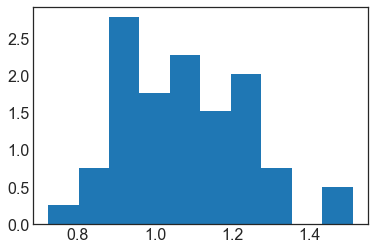

In [34]:
plt.hist(data1000_05['A1'],bins=10,density=True)

In [103]:
data1k05 = pd.read_csv('correlations1k05.csv')
data1k05

,rho,prho,C,dC,A1,dA1,A2,dA2,D,dD,a1,da1,a2,da2,d,dd
0,0.5,0.507665,2.201948,0.613881,1.153311,0.196531,0.362999,0.032405,1.014639,0.035907,1.075371,0.049110,0.354998,0.012800,1.013083,0.028727
1,0.5,0.480853,2.079245,0.547139,0.986581,0.154315,0.322648,0.027157,1.015948,0.036250,0.928276,0.038378,0.316535,0.011513,1.014182,0.027954
2,0.5,0.512436,2.303167,0.573464,1.049499,0.161468,0.319774,0.025980,1.082160,0.038657,0.988657,0.042102,0.314013,0.011504,1.080599,0.030177
3,0.5,0.546702,2.661669,0.667228,1.063159,0.174076,0.292201,0.023580,1.018194,0.036214,0.995436,0.042306,0.286965,0.010313,1.016839,0.028069
4,0.5,0.497080,2.277051,0.565157,1.004922,0.153655,0.308612,0.024893,1.068053,0.038535,0.947595,0.040311,0.303004,0.010925,1.066568,0.029719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.5,0.536774,2.471785,0.610226,1.071209,0.169039,0.310458,0.025043,1.079714,0.038899,1.006039,0.043609,0.304719,0.011075,1.077960,0.030231
396,0.5,0.560412,3.106937,0.830643,1.277534,0.234765,0.313248,0.026422,1.007899,0.035611,1.179947,0.054332,0.307196,0.011187,1.006630,0.028535
397,0.5,0.583601,2.991552,0.810171,1.307608,0.241709,0.329897,0.028181,1.010653,0.035636,1.206242,0.056594,0.323109,0.011777,1.009214,0.028760
398,0.5,0.526002,2.371332,0.629381,1.160595,0.192618,0.346777,0.030057,1.035393,0.036703,1.084058,0.048485,0.339718,0.012417,1.033759,0.029183


1.063941227269644 0.15428905830587167 0.1767419338057733 0.04228487329157142
0.994118110781075 0.13399997372170652 0.04354111573886395 0.008507779830677476
0.33986122170707356 0.03099200135583867 0.02982305110184233 0.0041696208030104825
0.33272776388498426 0.02969319216633135 0.01202465992657017 0.001151402955636694


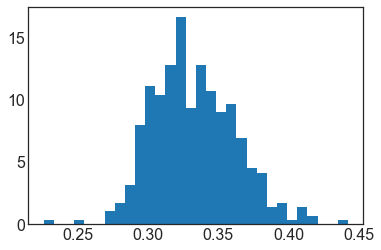

In [104]:
plt.hist(data1k05['a2'],bins=30,density=True)
print(data1k05['A1'].mean(),data1k05['A1'].std(),data1k05['dA1'].mean(),data1k05['dA1'].std())
print(data1k05['a1'].mean(),data1k05['a1'].std(),data1k05['da1'].mean(),data1k05['da1'].std())
print(data1k05['A2'].mean(),data1k05['A2'].std(),data1k05['dA2'].mean(),data1k05['dA2'].std())
print(data1k05['a2'].mean(),data1k05['a2'].std(),data1k05['da2'].mean(),data1k05['da2'].std())

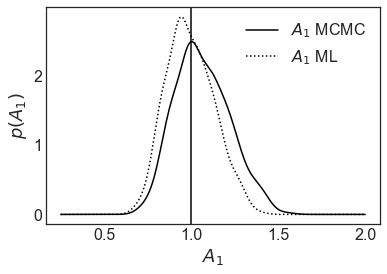

In [105]:
plt.figure(facecolor="white")
xs = np.linspace(0.25,2,200)
densityA1 = gaussian_kde(data1k05['A1'])
densityA2 = gaussian_kde(data1k05['A2'])
densitya1 = gaussian_kde(data1k05['a1'])
densitya2 = gaussian_kde(data1k05['a2'])
plt.plot(xs,densityA1(xs),"k-",label=r"$A_{1}$ MCMC")
plt.plot(xs,densitya1(xs),"k:",label=r"$A_{1}$ ML")
plt.axvline(x=1.0,color="k")
plt.legend()
plt.xlabel(r"$A_1$")
plt.ylabel(r"$p(A_{1})$")
plt.savefig("A1kde05.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

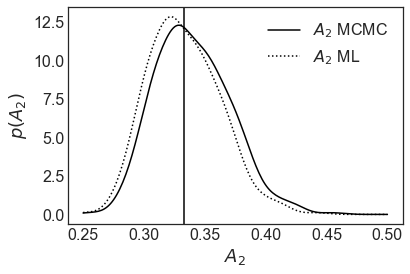

In [106]:
plt.figure(facecolor="white")
xs = np.linspace(0.25,0.5,200)
densityA2 = gaussian_kde(data1k05['A2'])
densitya2 = gaussian_kde(data1k05['a2'])
plt.plot(xs,densityA2(xs),"k-",label=r"$A_{2}$ MCMC")
plt.plot(xs,densitya2(xs),"k:",label=r"$A_{2}$ ML")
plt.axvline(x=0.3333,color="k")
plt.legend()
plt.xlabel(r"$A_2$")
plt.ylabel(r"$p(A_{2})$")
plt.savefig("A2kde05.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [65]:
data1k025 = pd.read_csv('correlations1k025.csv')
data1k025

,rho,prho,C,dC,A1,dA1,A2,dA2,D,dD,a1,da1,a2,da2,d,dd
0,0.25,0.159109,0.296778,0.238971,0.840408,0.118782,0.657392,0.080821,1.019702,0.034946,0.798679,0.024910,0.631362,0.020091,1.018349,0.033241
1,0.25,0.294789,0.912888,0.385564,1.175570,0.196545,0.622541,0.072820,1.043290,0.035665,1.094972,0.038051,0.600080,0.018311,1.041998,0.032218
2,0.25,0.242247,0.703294,0.331742,1.000650,0.157283,0.595304,0.069690,1.001843,0.034619,0.941391,0.030819,0.573893,0.017722,1.000760,0.031458
3,0.25,0.199030,0.625751,0.348288,1.153386,0.200316,0.720937,0.094190,1.007963,0.034220,1.072476,0.036714,0.689984,0.021398,1.006599,0.031476
4,0.25,0.158889,0.452084,0.287347,0.947414,0.148102,0.662294,0.083400,0.982442,0.033614,0.890917,0.028378,0.635452,0.020067,0.981260,0.031521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.25,0.270328,0.771028,0.343759,1.037159,0.163692,0.593214,0.068905,1.015356,0.034801,0.975114,0.031525,0.572018,0.018017,1.014323,0.031855
396,0.25,0.284170,0.887928,0.434873,1.391615,0.267647,0.749118,0.097979,1.040599,0.035507,1.278033,0.044521,0.716505,0.023069,1.039061,0.031841
397,0.25,0.141083,0.404644,0.253879,0.844558,0.118177,0.609268,0.071740,1.017397,0.035555,0.802578,0.025646,0.587421,0.018143,1.015941,0.032871
398,0.25,0.256111,0.806283,0.353962,0.994840,0.159533,0.557857,0.064437,0.974111,0.033739,0.932791,0.029897,0.538157,0.016797,0.972938,0.030526


1.0758144897779076 0.1607575594720723 0.18047464607859667 0.04544120818274805
1.0041012252296502 0.13872496535748483 0.03359461470778005 0.005859331347381333
0.6247488381384534 0.0701332387355429 0.07579024406369594 0.013396674802329613
0.6008037670999967 0.06471284816307284 0.018644421099685535 0.0022068114943402765


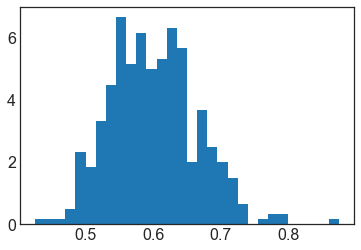

In [70]:
plt.hist(data1k025['a2'],bins=30,density=True)
print(data1k025['A1'].mean(),data1k025['A1'].std(),data1k025['dA1'].mean(),data1k025['dA1'].std())
print(data1k025['a1'].mean(),data1k025['a1'].std(),data1k025['da1'].mean(),data1k025['da1'].std())
print(data1k025['A2'].mean(),data1k025['A2'].std(),data1k025['dA2'].mean(),data1k025['dA2'].std())
print(data1k025['a2'].mean(),data1k025['a2'].std(),data1k025['da2'].mean(),data1k025['da2'].std())

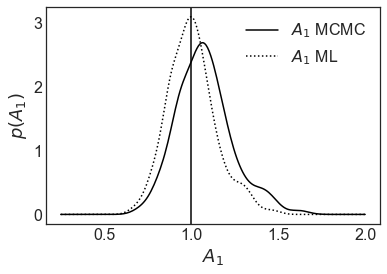

In [66]:
plt.figure(facecolor="white")
xs = np.linspace(0.25,2,200)
densityA1 = gaussian_kde(data1k025['A1'])
densityA2 = gaussian_kde(data1k025['A2'])
densitya1 = gaussian_kde(data1k025['a1'])
densitya2 = gaussian_kde(data1k025['a2'])
plt.plot(xs,densityA1(xs),"k-",label=r"$A_{1}$ MCMC")
plt.plot(xs,densitya1(xs),"k:",label=r"$A_{1}$ ML")
plt.axvline(x=1.0,color="k")
plt.legend()
plt.xlabel(r"$A_1$")
plt.ylabel(r"$p(A_{1})$")
plt.savefig("A1kde025.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

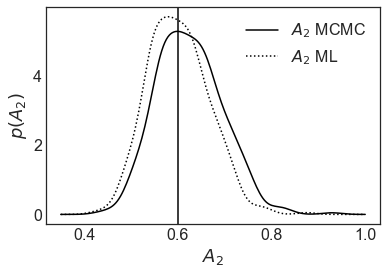

In [69]:
plt.figure(facecolor="white")
xs = np.linspace(0.35,1,200)
densityA2 = gaussian_kde(data1k025['A2'])
densitya2 = gaussian_kde(data1k025['a2'])
plt.plot(xs,densityA2(xs),"k-",label=r"$A_{2}$ MCMC")
plt.plot(xs,densitya2(xs),"k:",label=r"$A_{2}$ ML")
plt.axvline(x=0.6,color="k")
plt.legend()
plt.xlabel(r"$A_2$")
plt.ylabel(r"$p(A_{2})$")
plt.savefig("A2kde025.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

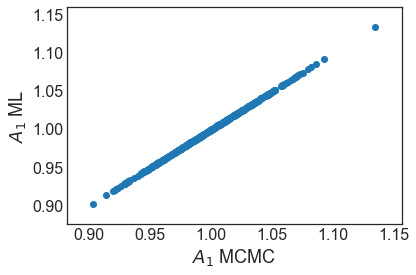

In [107]:
plt.figure(facecolor="white")
plt.scatter(data1k05['D'],data1k05['d'])
plt.xlabel(r"$A_1$ MCMC")
plt.ylabel(r"$A_{1}$ ML")
plt.savefig("A1corrkde025.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [77]:
print(pearsonr(data1k025['A1'],data1k025['a1']))
print(pearsonr(data1k025['A2'],data1k025['a2']))
print(pearsonr(data1k025['D'],data1k025['d']))

(0.9996350192345431, 0.0)
(0.9998819465020963, 0.0)
(0.999988582828996, 0.0)


[0.19702769 0.00871806]
factor of underestimation:  5.075428736953656


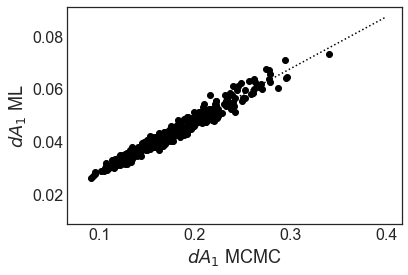

In [109]:
p1 = np.polyfit(data1k05['dA1'],data1k05['da1'],1)
print(p1)
print("factor of underestimation: ",1/p1[0])
dA1 = np.linspace(0.09,0.4,200)
da1 = p1[0]*dA1 + p1[1]
plt.figure(facecolor="white")
plt.scatter(data1k05['dA1'],data1k05['da1'],color="k")
plt.plot(dA1,da1,"k:")
plt.xlabel(r"$dA_1$ MCMC")
plt.ylabel(r"$dA_{1}$ ML")
plt.savefig("dA1corrkde05.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

[0.26825063 0.00402461]
factor of underestimation:  3.7278570472478068


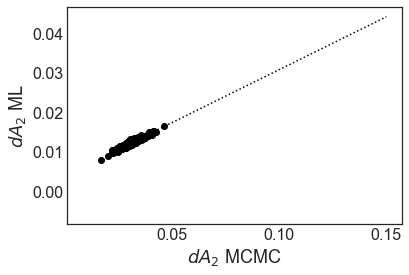

In [110]:
p2 = np.polyfit(data1k05['dA2'],data1k05['da2'],1)
print(p2)
print("factor of underestimation: ",1/p2[0])
dA2 = np.linspace(0.03,0.15,200)
da2 = p2[0]*dA2 + p2[1]
plt.figure(facecolor="white")
plt.scatter(data1k05['dA2'],data1k05['da2'],color="k")
plt.plot(dA2,da2,"k:")
plt.xlabel(r"$dA_2$ MCMC")
plt.ylabel(r"$dA_{2}$ ML")
plt.savefig("dA2corrkde05.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [86]:
p1 = np.polyfit(data1k025['dA1'],data1k025['da1'],1)
print(p1)

[0.12690797 0.01069094]


[0.12849691 0.01053264]
factor of underestimation:  7.782288407416904


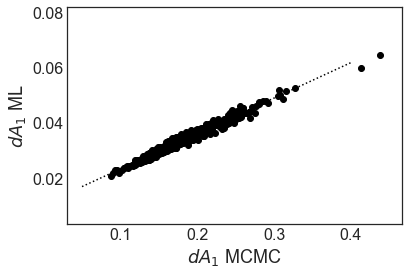

In [102]:
p1 = np.polyfit(data1k05['dA1'],data1k05['da1'],1)
print(p1)
print("factor of underestimation: ",1/p1[0])
dA1 = np.linspace(0.05,0.4,200)
da1 = p1[0]*dA1 + p1[1]
plt.figure(facecolor="white")
plt.scatter(data1k05['dA1'],data1k05['da1'],color="k")
plt.plot(dA1,da1,"k:")
plt.xlabel(r"$dA_1$ MCMC")
plt.ylabel(r"$dA_{1}$ ML")
plt.savefig("dA1corrkde05.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

[0.20921369 0.00388881]
factor of underestimation:  4.779802045687235


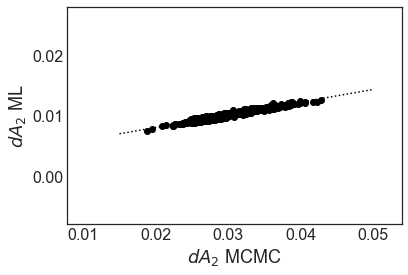

In [101]:
p2 = np.polyfit(data1k05['dA2'],data1k05['da2'],1)
print(p2)
print("factor of underestimation: ",1/p2[0])
dA2 = np.linspace(0.015,0.05,200)
da2 = p2[0]*dA2 + p2[1]
plt.figure(facecolor="white")
plt.scatter(data1k05['dA2'],data1k05['da2'],color="k")
plt.plot(dA2,da2,"k:")
plt.xlabel(r"$dA_2$ MCMC")
plt.ylabel(r"$dA_{2}$ ML")
plt.savefig("dA2corrkde05.png",format="png",dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")